# 05 Haabersti hõberemmelgas  - leksikonid


In [48]:
import csv
import pandas as pd
from estnltk import Text
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [49]:
leksikon_looduslik = []
with open('remmelgas_looduslik pühapaik_sõnad.csv', encoding="utf8") as csv_file:
    reader = csv.reader(csv_file, delimiter=';')
    header = next(reader)
    for row in reader:
        leksikon_looduslik.append(row[0])

In [50]:
leksikon_rahvuslik = []
with open('remmelgas_traditsioon ja rahvuslik identiteet_sõnad.csv', encoding="utf8") as csv_file:
    reader = csv.reader(csv_file, delimiter=';')
    header = next(reader)
    for row in reader:
        leksikon_rahvuslik.append(row[0])

In [51]:
data = pd.read_excel('remmelgas/KÕIK TEKSTID_Haabersti_hoberemmelgas.xlsx', engine='openpyxl')

In [52]:
corpus_texts = data['text'].to_list()

In [53]:
corpus = [Text(t).tag_layer(['morph_analysis']) for t in corpus_texts]

In [54]:
leitud_list1 = []
looduslik_arv_list = []
for text in corpus:
    leitud_tekstist = []
    looduslik_arv = 0
    for word in text.morph_analysis:
        if (word.lemma[0]or word.text) in leksikon_looduslik:
            looduslik_arv = looduslik_arv +1
            leitud_tekstist.append(word.text)
    looduslik_arv_list.append(looduslik_arv)
    leitud_list1.append(leitud_tekstist)  

In [55]:
leitud_list2 = []
rahvuslik_arv_list = []
for text in corpus:
    leitud_tekstist = []
    rahvuslik_arv = 0
    for word in text.morph_analysis:
        if (word.lemma[0] or word.text) in leksikon_rahvuslik:
            rahvuslik_arv = rahvuslik_arv + 1
            leitud_tekstist.append(word.text)
    rahvuslik_arv_list.append(rahvuslik_arv)        
    leitud_list2.append(leitud_tekstist) 

In [56]:
data['looduslik'] = leitud_list1
data['looduslik_arv'] = looduslik_arv_list
data['rahvuslik'] = leitud_list2
data['rahvuslik_arv'] = rahvuslik_arv_list

In [58]:
data.to_csv('remmelgas_TEKSTID_leksikoniga.csv',index=False)
read_file = pd.read_csv (r'remmelgas_TEKSTID_leksikoniga.csv')
read_file.to_excel (r'remmelgas_TEKSTID_leksikoniga.xlsx', index = None, header=True)

In [88]:
import collections
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def sonad(leitud_list, leksikon):
    list2 = []
    for l in leitud_list:
        for k in l:
            list2.append(k)
    list2_lemma = []

    for t in list2:
        tekst = Text(t).tag_layer(['morph_analysis']).lemma[0][0]
        list2_lemma.append(tekst.lower())

    counter=collections.Counter(list2_lemma)
    # Counter data, counter is your counter object
    keys = counter.keys()
    y_pos = np.arange(len(keys))
    # get the counts for each key, assuming the values are numerical
    performance = [counter[k] for k in keys]
    # not sure if you want this :S
    error = np.random.rand(len(keys))

    plt.barh(y_pos, performance, align='center', alpha=0.4)
    plt.yticks(y_pos, keys)
    plt.xlabel('Loendus')
    plt.title(leksikon + ' - sõnade (lemmade) kasutus artiklites')

    plt.show()

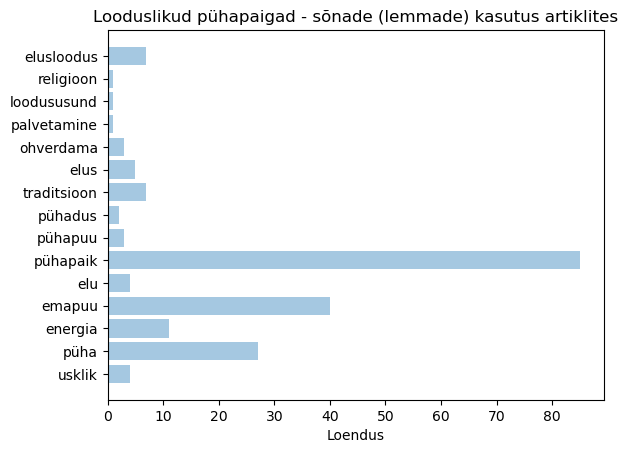

In [89]:
sonad(leitud_list1, "Looduslikud pühapaigad")

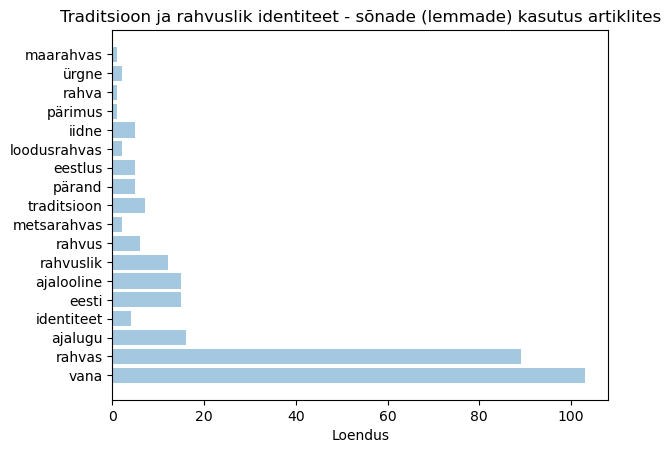

In [90]:
sonad(leitud_list2, "Traditsioon ja rahvuslik identiteet")